<a href="https://colab.research.google.com/github/AnassElhaoussi/linear-regression-projects/blob/main/first_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **My first ml project**


In [2]:
import pandas as pd
teams = pd.read_csv("https://raw.githubusercontent.com/dataquestio/project-walkthroughs/master/beginner_ml/teams.csv")
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [3]:
teams[teams.isnull().any(axis=1)]


,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [4]:
teams = teams.dropna()
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [5]:
teams.corr()["medals"]

<ipython-input-5-90b4da85dcae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teams.corr()["medals"]


year          -0.034870
athletes       0.839909
age            0.023231
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

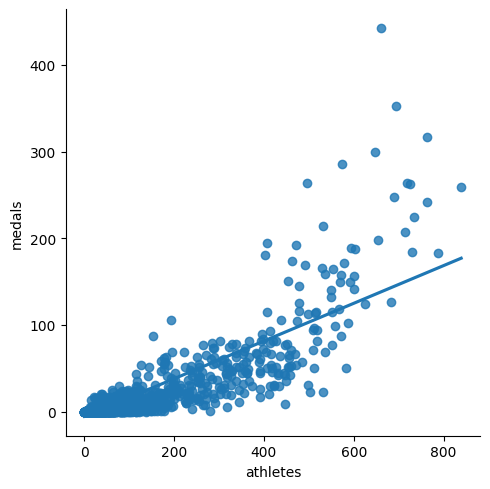

In [6]:
import seaborn as sns

sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

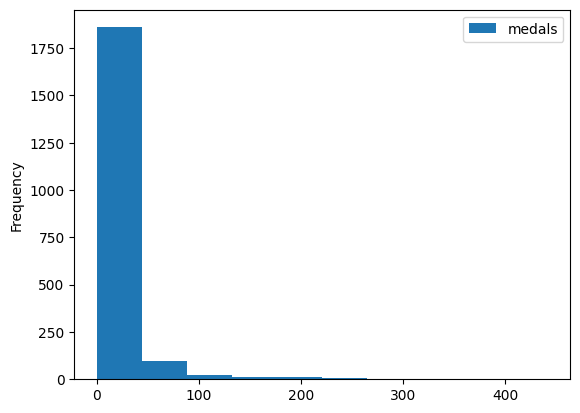

In [7]:
teams.plot.hist(y="medals")

In [8]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()
train

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2137,ZIM,Zimbabwe,1992,28,21.2,0.0,0
2138,ZIM,Zimbabwe,1996,21,23.8,0.0,0
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3


In [9]:
train.shape

(1609, 7)

In [10]:
test.shape

(405, 7)

In [11]:
predictors = ["athletes", "prev_medals"]
target = ["medals"]

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(train[predictors], train[target])
predictions = reg.predict(test[predictors])
predictions

array([[-9.61221245e-01],
       [-1.17633261e+00],
       [-1.42503158e+00],
       [-1.71184673e+00],
       [ 2.15562926e+00],
       [ 3.91463636e+00],
       [-1.71184673e+00],
       [-1.85525431e+00],
       [ 3.67563128e-01],
       [-2.77770967e-01],
       [-1.85525431e+00],
       [-1.49673537e+00],
       [ 4.67519911e+01],
       [ 2.87550937e+01],
       [ 4.58450091e+00],
       [ 2.54773581e+00],
       [-1.85525431e+00],
       [-1.64014295e+00],
       [-1.85525431e+00],
       [-1.85525431e+00],
       [ 1.46556876e+02],
       [ 1.20571799e+02],
       [ 6.56314795e+00],
       [ 3.95275254e+00],
       [ 7.34283247e+00],
       [ 1.03117468e+01],
       [ 5.19171882e+00],
       [ 3.58517645e+00],
       [-1.64014295e+00],
       [-1.64014295e+00],
       [-1.56843916e+00],
       [-1.20992022e+00],
       [-1.71184673e+00],
       [-1.42503158e+00],
       [ 1.17929959e+01],
       [ 1.00049298e+01],
       [-1.78355052e+00],
       [-1.71184673e+00],
       [-1.5

In [13]:
test["predictions"] = predictions
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [14]:
test.loc[test["predictions"] < 0, "predictions"] = 0
test["predictions"] = test["predictions"].round()
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [15]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["medals"], test["predictions"])
error

3.2987654320987656

In [20]:
difference = test["medals"] - test["predictions"]
errors = difference.abs()
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [26]:
error_by_team = errors.groupby(test["team"]).mean()
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [31]:
average_medals_by_team = test["medals"].groupby(test["team"]).mean()
average_medals_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

In [32]:
error_ratio = error_by_team / average_medals_by_team
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

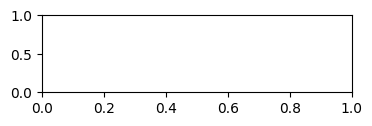

In [33]:
error_ratio[~pd.isnull(error_ratio)]

In [36]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64